# Blackjack Simulator: Cheating Dealer & AI Player Edition 🎲🃏

This Jupyter Notebook is an interactive **Blackjack game simulator** designed to quantify the impact of a **weighted (cheating) dealer** and to train an AI agent using **Q-learning** to overcome this disadvantage.

---

## Overview

The project first establishes a baseline by simulating thousands of Blackjack rounds between a player using a simple, fixed strategy ("hit until 17") and a dealer using a **weighted deck**. This weighted deck increases the dealer's probability of drawing high-value cards, creating a quantifiable disadvantage for the player.

Next, the notebook implements a **Q-learning algorithm** to train an agent over many rounds against this same cheating dealer. The goal is for the agent to learn an optimal policy—deciding when to "hit" or "stand"—to maximize its win rate despite the unfair odds.

---

## Features

-   **Baseline Analysis**: Simulates a fixed player strategy against the cheating dealer to measure the dealer's initial advantage.
-   **Q-Learning Agent**: Implements a reinforcement learning model to train an AI player and discover a superior playing strategy.
-   **Strategy Comparison**: Directly compares the performance of the naive, fixed strategy against the optimized strategy learned by the Q-learning agent.
-   **Data Visualisation**: Generates clustered bar charts to visually compare the win/loss outcomes before and after AI training.
-   **Hyperparameter Tuning**: Includes a random search to find the most effective hyperparameters for the Q-learning model to maximize its performance.

This notebook combines **game simulation, reinforcement learning and data visualization** to demonstrate how an adaptive AI strategy can be developed to overcome a statistical disadvantage in a classic game of chance.

In [401]:
import random
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [402]:
deck = {
    '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10,
    'J': 10, 'Q': 10, 'K': 10, 'A': 11
}

# flexible aces
def calculate_hand_value(hand):
    value = sum([deck[card] for card in hand])
    aces = hand.count('A')
    while value > 21 and aces:
        value -= 10
        aces -= 1
    return value

In [403]:

#  if want to do single round simulation, uncomment below

# # Draw cards for player and dealer
# playerHand = random.choices(
#     population=list(deck.keys()),
#     weights=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#     k=2
# )

# dealerHand = random.choices(
#     population=list(deck.keys()),
#     weights=[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
#     k=2
# )
# print("Dealer Hand:", dealerHand[0], "?")
# print("Player Hand:",playerHand)
# print("Total:", calculate_hand_value(playerHand))


# # Single round simulation
# while True:
#     choice = input("Do you want to hit or stand? (h/s): ").lower()
#     if choice == 'h':
#         card = random.choices(
#     population=list(deck.keys()),
#     weights=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#     k=1)
#         playerHand.append(card[0])
#         total = calculate_hand_value(playerHand)
#         print("Player Hand:", playerHand)
#         print("Total:", total)
#         if total > 21:
#             print("Bust! You lose.")
#             exit()
#     elif choice == 's':
#         break


# # Dealer's turn
# print("Dealer's turn...")
# print("Dealer Hand:", dealerHand)
# while calculate_hand_value(dealerHand) < 17:
#     card = random.choices(
#         population=list(deck.keys()),
#         weights=[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
#         k=1
#     )
#     dealerHand.append(card[0])
#     print("Dealer Hand:", dealerHand)
# dealerTotal = calculate_hand_value(dealerHand)
# playerTotal = calculate_hand_value(playerHand)
# print("Dealer Total:", dealerTotal)
# print("Player Total:", playerTotal)
# # Determine winner
# if dealerTotal > 21 or playerTotal > dealerTotal:
#     print("You win!")
# elif playerTotal < dealerTotal:
#     print("Dealer wins!")
# else:
#     print("It's a tie!")




In [404]:
# play n rounds and collect statistics
n = int(input("Enter number of rounds to simulate: "))
results = {'Player Wins': 0, 'Dealer Wins': 0, 'Ties': 0}
playerTotalSum = 0
dealerTotalSum = 0
for _ in range(n):
    # Draw cards for player and dealer
    playerHand = random.choices(
        population=list(deck.keys()),
        weights=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        k=2
    )
    dealerHand = random.choices(
        population=list(deck.keys()),
        weights=[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
        k=2
    )

    # Player's turn (simple strategy: hit until 17 or higher)
    while calculate_hand_value(playerHand) < 17:
        card = random.choices(
            population=list(deck.keys()),
            weights=[1,1,1,1,1,1,1,1,1,1,1,1,1],
            k=1
        )
        playerHand.append(card[0])
        if calculate_hand_value(playerHand) > 21:
            results['Dealer Wins'] += 1
            break
    else:
        # Dealer's turn
        while calculate_hand_value(dealerHand) < 17:
            card = random.choices(
                population=list(deck.keys()),
                weights=[1,1,1,1,1,1,1,2,2,2,2,2,2],
                k=1
            )
            dealerHand.append(card[0])
        dealerTotal = calculate_hand_value(dealerHand)
        playerTotal = calculate_hand_value(playerHand)
        if dealerTotal > 21 or playerTotal > dealerTotal:
            results['Player Wins'] += 1
        elif playerTotal < dealerTotal:
            results['Dealer Wins'] += 1
        else:
            results['Ties'] += 1
        
        playerTotalSum += calculate_hand_value(playerHand)
        dealerTotalSum += calculate_hand_value(dealerHand)
print("After", n, "rounds:")
print(results)

After 50000 rounds:
{'Player Wins': 18630, 'Dealer Wins': 25980, 'Ties': 5390}


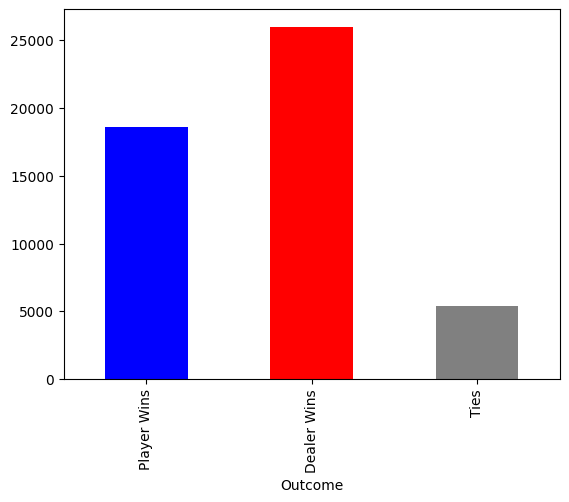

Probabilities: {'Player Wins': 0.3726, 'Dealer Wins': 0.5196, 'Ties': 0.1078}
Average hand value for player: 13.62252
Average hand value for dealer: 14.69646


In [405]:
df = pd.DataFrame(list(results.items()), columns=['Outcome', 'Count'])
df.plot(kind='bar', x='Outcome', y='Count', legend=False, color=['blue', 'red', 'gray'])
matplotlib.pyplot.show()
probabilities = {key: value / n for key, value in results.items()}
print("Probabilities:", probabilities)

average_hand = playerTotalSum / n
print("Average hand value for player:", average_hand)
average_dealer_hand = dealerTotalSum / n
print("Average hand value for dealer:", average_dealer_hand)
preResults = [results, playerTotalSum, dealerTotalSum]


## Set up Q-Learning

**State** - player's total sum, dealer's visible card   
**Action** - hit or stand  
**Reward** - +1 for win, -1 for loss, 0 for tie  
**Hyperparameters** - learning rate, discount factor, exploration rate  

*Learning rate* - How much new information overrides old  
*Discount factor* - importance of future rewards  
*Exploration rate* - probability of choosing random action  



In [406]:
playerTotalSum = 0
dealerTotalSum = 0
results = {'Player Wins': 0, 'Dealer Wins': 0, 'Ties': 0}


learning_rate = 0.1
discount_factor = 0.9
exploration_rate = 1.0
exploration_decay = 0.995

n = int(input("Enter number of rounds to simulate with Q-learning: "))







In [407]:
# simulate n rounds with Q-learning

def training(n, learning_rate, discount_factor, exploration_decay):
    actions = ['hit', 'stand']

    q_table = {}
    for player_sum in range(4, 22):
        for dealer_card in range(2, 12):
            q_table[(player_sum, dealer_card)] = {action: 0.0 for action in actions}

    exploration_rate = 1.0
    playerTotalSum = 0
    dealerTotalSum = 0
    results = {'Player Wins': 0, 'Dealer Wins': 0, 'Ties': 0}

    
    for _ in range(n):
        # Draw cards for player and dealer
        playerHand = random.choices(
            population=list(deck.keys()),
            weights=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            k=2
        )
        dealerHand = random.choices(
            population=list(deck.keys()),
            weights=[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
            k=2
        )
        player_sum = calculate_hand_value(playerHand)
        dealer_card = deck[dealerHand[0]]
        state = (player_sum, dealer_card)
        while True:
            if player_sum >= 21:
                action = 'stand'
            elif random.random() < exploration_rate:
                action = random.choice(actions)
            else:
                if state not in q_table:
                    q_table[state] = {a: 0.0 for a in actions}
                action = max(q_table[state], key=q_table[state].get)

            if action == 'hit':

                card = random.choices(
                    population=list(deck.keys()),
                    weights=[1,1,1,1,1,1,1,1,1,1,1,1,1],
                    k=1
                )
                playerHand.append(card[0])
                player_sum = calculate_hand_value(playerHand)
                if player_sum > 21:
                    results['Dealer Wins'] += 1
                    reward = -1
                    next_state = None
                    if state not in q_table:
                        q_table[state] = {a: 0.0 for a in actions}
                    old_value = q_table[state][action]
                    q_table[state][action] = (1 - learning_rate) * old_value + learning_rate * reward
                    break
                else:
                    next_state = (player_sum, dealer_card)
                    reward = 0
            else:  # stand
                while calculate_hand_value(dealerHand) < 17:
                    card = random.choices(
                        population=list(deck.keys()),
                        weights=[1,1,1,1,1,1,1,2,2,2,2,2,2],
                        k=1
                    )
                    dealerHand.append(card[0])
                dealerTotal = calculate_hand_value(dealerHand)
                playerTotal = calculate_hand_value(playerHand)
                if dealerTotal > 21 or playerTotal > dealerTotal:
                    results['Player Wins'] += 1
                    reward = 1
                
                elif playerTotal < dealerTotal:
                    results['Dealer Wins'] += 1
                    if playerTotal == 21:
                        reward = 1
                    else:
                        reward = -1
                else:
                    results['Ties'] += 1
                    reward = 0
                next_state = None
                break
            old_value = q_table[state][action]
            next_max = max(q_table[next_state].values()) if next_state else 0
            new_value = (1 - learning_rate) * old_value + learning_rate * (reward + discount_factor * next_max)
            q_table[state][action] = new_value
            state = next_state
        exploration_rate *= exploration_decay

    win_rate = results['Player Wins'] / n
    return win_rate, results, q_table




After 50000 rounds with Q-learning:
{'Player Wins': 18972, 'Dealer Wins': 27494, 'Ties': 3534}


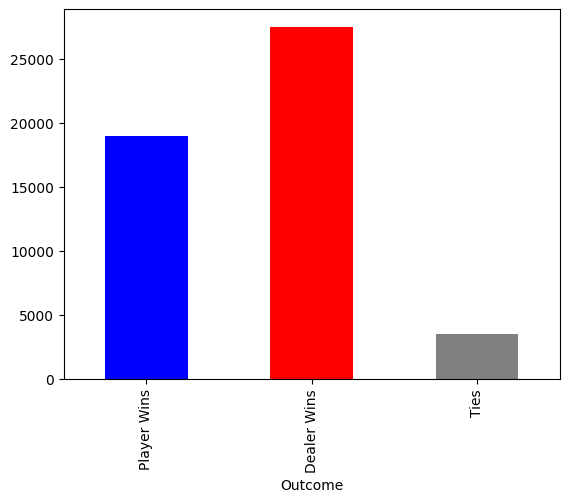

Probabilities with Q-learning: {'Player Wins': 0.37944, 'Dealer Wins': 0.54988, 'Ties': 0.07068}
Learned strategy (player_sum, dealer_card): action
(4, 2) : hit
(4, 3) : hit
(4, 4) : hit
(4, 5) : hit
(4, 6) : hit
(4, 7) : hit
(4, 8) : hit
(4, 9) : hit
(4, 10) : hit
(4, 11) : hit
(5, 2) : hit
(5, 3) : hit
(5, 4) : hit
(5, 5) : hit
(5, 6) : hit
(5, 7) : hit
(5, 8) : hit
(5, 9) : hit
(5, 10) : hit
(5, 11) : hit
(6, 2) : hit
(6, 3) : hit
(6, 4) : hit
(6, 5) : hit
(6, 6) : hit
(6, 7) : hit
(6, 8) : hit
(6, 9) : hit
(6, 10) : hit
(6, 11) : hit
(7, 2) : hit
(7, 3) : hit
(7, 4) : hit
(7, 5) : hit
(7, 6) : hit
(7, 7) : hit
(7, 8) : hit
(7, 9) : hit
(7, 10) : hit
(7, 11) : hit
(8, 2) : hit
(8, 3) : hit
(8, 4) : hit
(8, 5) : hit
(8, 6) : hit
(8, 7) : hit
(8, 8) : hit
(8, 9) : hit
(8, 10) : hit
(8, 11) : hit
(9, 2) : hit
(9, 3) : hit
(9, 4) : hit
(9, 5) : hit
(9, 6) : hit
(9, 7) : hit
(9, 8) : hit
(9, 9) : hit
(9, 10) : hit
(9, 11) : hit
(10, 2) : hit
(10, 3) : hit
(10, 4) : hit
(10, 5) : hit
(10,

In [408]:
output = training(n, learning_rate, discount_factor, exploration_decay)
results = output[1]
q_table = output[2]
# results of Q-learning simulation
print("After", n, "rounds with Q-learning:")
print(results)
df = pd.DataFrame(list(results.items()), columns=['Outcome', 'Count'])
df.plot(kind='bar', x='Outcome', y='Count', legend=False, color=['blue', 'red', 'gray'])
matplotlib.pyplot.show()
probabilities = {key: value / n for key, value in results.items()}
print("Probabilities with Q-learning:", probabilities)

# what strategy did Q-learning learn?

strategy = {}
for state, actions in q_table.items():
    best_action = max(actions, key=actions.get)
    player_sum, dealer_card = state
    if player_sum >= 21:
        best_action = 'stand'
    strategy[state] = best_action

print("Learned strategy (player_sum, dealer_card): action")
for state, action in strategy.items():
    print(state, ":", action)

playerTotalSum = 0
dealerTotalSum = 0
results = {'Player Wins': 0, 'Dealer Wins': 0, 'Ties': 0}


After 50000 rounds without exploration:
{'Player Wins': 22519, 'Dealer Wins': 24298, 'Ties': 3183}


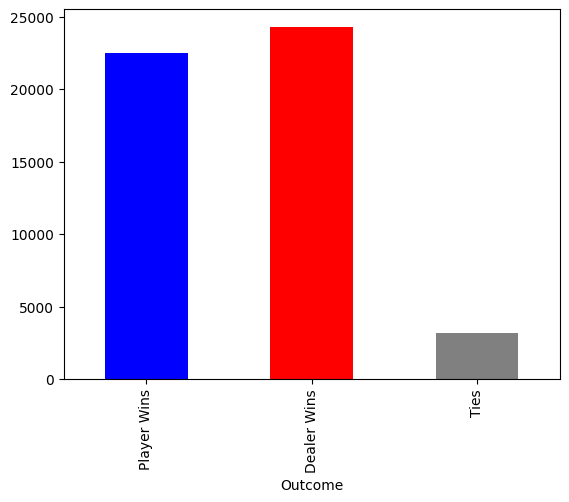

Average hand value for player: 16.3621
Average hand value for dealer: 20.60206
Probabilities without exploration: {'Player Wins': 0.45038, 'Dealer Wins': 0.48596, 'Ties': 0.06366}


In [409]:
def play(n, q_table):
    playerTotalSum = 0
    dealerTotalSum = 0
    results = {'Player Wins': 0, 'Dealer Wins': 0, 'Ties': 0}

    actions = ['hit', 'stand']

    for _ in range(n):
        # Draw cards
        playerHand = random.choices(list(deck.keys()), k=2)
        dealerHand = random.choices(list(deck.keys()), k=2)

        player_sum = calculate_hand_value(playerHand)
        dealer_card = deck[dealerHand[0]]
        state = (player_sum, dealer_card)

        while True:
            # Force stand at 21 or more
            if player_sum >= 21:
                action = 'stand'
            else:
                # Greedy action from Q-table
                if state not in q_table:
                    q_table[state] = {a: 0.0 for a in actions}
                action = max(q_table[state], key=q_table[state].get)

            if action == 'hit':
                card = random.choices(list(deck.keys()), k=1)[0]
                playerHand.append(card)
                player_sum = calculate_hand_value(playerHand)

                if player_sum > 21:  # bust
                    results['Dealer Wins'] += 1
                    break
                else:
                    state = (player_sum, dealer_card)
            else:  # stand
                dealer_sum = sum(deck[card] for card in dealerHand)
                while dealer_sum < 17:
                    card = random.choices(list(deck.keys()), k=1)[0]
                    dealerHand.append(card)
                    dealer_sum = sum(deck[card] for card in dealerHand)

                playerTotal = player_sum
                dealerTotal = dealer_sum

                if dealerTotal > 21 or playerTotal > dealerTotal:
                    results['Player Wins'] += 1
                elif playerTotal < dealerTotal:
                    results['Dealer Wins'] += 1
                else:
                    results['Ties'] += 1
                break

        playerTotalSum += sum(deck[card] for card in playerHand)
        dealerTotalSum += sum(deck[card] for card in dealerHand)
    return results, playerTotalSum, dealerTotalSum

q_table = training(n, learning_rate, discount_factor, exploration_decay)[2]
output = play(n, q_table)
results = output[0]
playerTotalSum = output[1]
dealerTotalSum = output[2]


# Show results
print("After", n, "rounds without exploration:")
print(results)
df = pd.DataFrame(list(results.items()), columns=['Outcome', 'Count'])
df.plot(kind='bar', x='Outcome', y='Count', legend=False, color=['blue', 'red', 'gray'])
plt.show()

# Probabilities
probabilities = {key: value / n for key, value in results.items()}
average_hand = playerTotalSum / n
average_dealer_hand = dealerTotalSum / n
print("Average hand value for player:", average_hand)
print("Average hand value for dealer:", average_dealer_hand)
print("Probabilities without exploration:", probabilities)


Pre-training results for comparison:
{'Player Wins': 18630, 'Dealer Wins': 25980, 'Ties': 5390}
Post training results:
{'Player Wins': 22519, 'Dealer Wins': 24298, 'Ties': 3183}
Hyperparameters:
Learning Rate: 0.1
Discount Factor: 0.9
Exploration Decay: 0.995


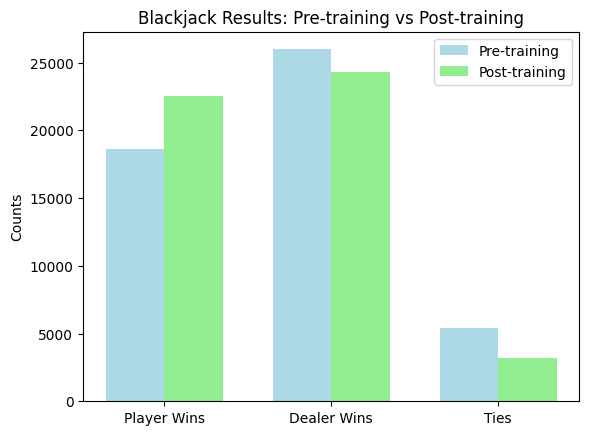

Difference (Post-training - Pre-training): {'Player Wins': 3889, 'Dealer Wins': -1682, 'Ties': -2207}


In [410]:
# compare with pre training results as clustered bar chart
print("Pre-training results for comparison:")
print(preResults[0])

print("Post training results:")
print(results)

# hyperparameters
print("Hyperparameters:")
print("Learning Rate:", learning_rate)
print("Discount Factor:", discount_factor)
print("Exploration Decay:", exploration_decay)

# clustered bar chart
labels = ['Player Wins', 'Dealer Wins', 'Ties']
pre_counts = [preResults[0][label] for label in labels]
post_counts = [results[label] for label in labels]
x = range(len(labels))
width = 0.35
fig, ax = plt.subplots()
ax.bar(x, pre_counts, width, label='Pre-training', color='lightblue')
ax.bar([p + width for p in x], post_counts, width, label='Post-training', color='lightgreen')
ax.set_ylabel('Counts')
ax.set_title('Blackjack Results: Pre-training vs Post-training')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()
plt.show()

difference = {key: results[key] - preResults[0][key] for key in labels}
print("Difference (Post-training - Pre-training):", difference)


In [418]:
# Figure out best hyperparameters using random search
best_score = -1
best_params = None
for _ in range(20):  # try 10 different sets of hyperparameters
    learning_rate = random.uniform(0.01, 0.2)
    discount_factor = random.uniform(0.8, 0.99)
    exploration_decay = random.uniform(0.9, 0.999)
    score = training(n, learning_rate, discount_factor, exploration_decay)[0]
    if score> best_score:
        best_score = score
        best_params = (learning_rate, discount_factor, exploration_decay)

print("Best hyperparameters found:")
print("Learning Rate:", round(best_params[0], 3))
print("Discount Factor:", round(best_params[1], 3))
print("Exploration Decay:", round(best_params[2], 3))

print("Best win rate achieved:", round(best_score, 4))


Best hyperparameters found:
Learning Rate: 0.024
Discount Factor: 0.88
Exploration Decay: 0.969
Best win rate achieved: 0.3823


## Conclusion

This project successfully simulated the game of Blackjack with a key twist: a "cheating" dealer whose deck was weighted to favor high-value cards. The analysis demonstrates a clear, data-driven comparison between a fixed, simplistic player strategy and an adaptive strategy developed using Q-learning.

### Key Findings:

1.  **Quantifiable Dealer Advantage:** The initial simulation, pitting a simple "hit until 17" player strategy against the cheating dealer, established a clear baseline. The dealer held a significant statistical advantage, winning approximately **52%** of the rounds compared to the player's **37%**. This highlights the effectiveness of the weighted deck in skewing game outcomes.

2.  **Q-Learning Develops a Cautious Strategy:** To counter the dealer's advantage, a Q-learning model was trained over 50,000 rounds. The resulting optimal strategy was notably conservative: the agent learned to **stand on any hand total of 12 or higher**, regardless of the dealer's visible card. This is a logical adaptation, as taking another card (hitting) is much riskier when the dealer is more likely to achieve a high total.

3.  **Learned Strategy Significantly Improves Performance:** When the performance of the trained Q-learning agent was evaluated, it showed a dramatic improvement in the player's win rate.
    * The player's win rate increased from **~37%** with the fixed strategy to **~45%** using the Q-learning strategy.
    * This represents an increase of nearly **4,000 player wins** over the 50,000-round simulation, effectively mitigating a large portion of the cheating dealer's initial advantage.

4.  **Hyperparameter Optimisation:** The simulation was further refined by performing a random search for optimal hyperparameters. This identified the most effective `learning rate (0.024)`, `discount factor (0.88)`, and `exploration decay (0.969)` to maximise the agent's learning efficiency, achieving a peak win rate of over **38.2%** during the training phase.

In summary, this notebook serves as a practical demonstration of reinforcement learning's power. It not only quantifies the impact of a biased opponent in a game of chance but also shows how a Q-learning agent can explore the state space to learn and implement a superior strategy, significantly improving outcomes for the player.
